# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#start with an empty list for each 
city_id=[]
city_name=[]
country=[]
long=[]
lat=[]
temp =[]
humidity=[]
clouds=[]
wind_speed=[]
max_temp= []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API

    response = requests.get(query_url + city).json()
    
    try:
        current_city_id=response['id']
        city_id.append(current_city_id)
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
    
        #display city info at each iteration
        print(f"The city of {city} has City ID: {current_city_id}")

    #when info does not exist       
    except KeyError:
        
        print("That information requested does not exist in this record....")


The city of vaini has City ID: 4032243
That information requested does not exist in this record....
That information requested does not exist in this record....
That information requested does not exist in this record....
The city of tuktoyaktuk has City ID: 6170031
The city of valle de juarez has City ID: 3980614
The city of inverell has City ID: 2162662
The city of ponta do sol has City ID: 2264557
The city of konya has City ID: 306569
The city of zheshart has City ID: 463144
The city of albany has City ID: 5106841
The city of clyde river has City ID: 5924351
The city of airai has City ID: 1651810
The city of ketou has City ID: 2393551
The city of bushehr has City ID: 139817
The city of marawi has City ID: 1701054
The city of ushuaia has City ID: 3833367
The city of butaritari has City ID: 2110227
The city of busselton has City ID: 2075265
That information requested does not exist in this record....
The city of hamilton has City ID: 4513583
The city of victoria has City ID: 1819729
T

The city of lebu has City ID: 3883457
The city of torbay has City ID: 6167817
The city of fare has City ID: 4034496
The city of tacna has City ID: 3928128
The city of sinnamary has City ID: 3380290
The city of khatanga has City ID: 2022572
The city of pueblo has City ID: 5435464
The city of howard springs has City ID: 6301965
The city of usinsk has City ID: 863061
The city of voznesenye has City ID: 471160
The city of katobu has City ID: 1640972
The city of pangnirtung has City ID: 6096551
The city of mackay has City ID: 2159220
The city of castro has City ID: 3466704
That information requested does not exist in this record....
The city of hilo has City ID: 5855927
The city of coihaique has City ID: 3894426
The city of east london has City ID: 1006984
The city of faanui has City ID: 4034551
The city of sarh has City ID: 2425791
The city of isangel has City ID: 2136825
The city of margate has City ID: 2643044
The city of northam has City ID: 2641434
The city of at-bashi has City ID: 152

The city of smoky lake has City ID: 6150293
The city of yulara has City ID: 6355222
The city of shymkent has City ID: 1518980
The city of boueni has City ID: 1090467
The city of coquimbo has City ID: 3893629
The city of carnarvon has City ID: 2074865
The city of ostrovnoy has City ID: 556268
The city of viransehir has City ID: 298033
That information requested does not exist in this record....
The city of makinsk has City ID: 1521230
The city of angoche has City ID: 1052944
The city of essau has City ID: 2413533
The city of arcata has City ID: 5558953
The city of husavik has City ID: 2629833
The city of poshekhonye has City ID: 506029
The city of doha has City ID: 290030
The city of eyl has City ID: 60019
The city of puri has City ID: 1259184
The city of horqueta has City ID: 3480780
The city of yagodnoye has City ID: 2119626
The city of ouadda has City ID: 236901
The city of hauterive has City ID: 3013748
The city of richards bay has City ID: 962367
The city of dao has City ID: 171563

The city of shaunavon has City ID: 6145425
The city of nelson bay has City ID: 2155562
The city of malayal has City ID: 1702944
The city of plouzane has City ID: 2986626
The city of meulaboh has City ID: 1214488
The city of hudson bay has City ID: 5978133
The city of banda aceh has City ID: 1215502
The city of halden has City ID: 6453395
The city of chacabuco has City ID: 3861953
The city of batticaloa has City ID: 1250161
The city of luwuk has City ID: 1637001
The city of axim has City ID: 2303611
The city of port macquarie has City ID: 2152659
The city of grindavik has City ID: 3416888
The city of gravelbourg has City ID: 5965462
The city of taoudenni has City ID: 2450173
The city of bien hoa has City ID: 1587923
The city of sidi ali has City ID: 2487130
The city of bubaque has City ID: 2374583
The city of shubarshi has City ID: 608270
The city of amalapuram has City ID: 1278935
The city of las margaritas has City ID: 3524744
The city of tornio has City ID: 634093
The city of te anau

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
cities_df = pd.DataFrame({"City ID": city_id, "City": city_name, "Country": country, "Lat": lat, "Long": long,
                         "Temperature": temp, "Percent Humidity": humidity, "Clouds": clouds,
                         "Wind Speed": wind_speed,"Max Temp":max_temp})
cities_df.head()

,City ID,City,Country,Lat,Long,Temperature,Percent Humidity,Clouds,Wind Speed,Max Temp
0,4032243,Vaini,TO,-21.2000,-175.2000,78.96,78,20,13.80,78.96
1,6170031,Tuktoyaktuk,CA,69.4541,-133.0374,26.01,92,99,4.29,26.01
2,3980614,Valle de Juárez,MX,19.9333,-102.9333,59.11,94,100,3.67,59.11
3,2162662,Inverell,AU,-29.7833,151.1167,70.16,28,99,4.00,70.16
4,2264557,Ponta do Sol,PT,32.6667,-17.1000,68.36,67,57,6.87,68.72


In [87]:
#export to .csv
cities_df.to_csv(output_data_file, index=False, header=True)

count_row = cities_df.shape[0]
print(count_row)

578


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [88]:
new_cities_df = cities_df.loc[cities_df['Percent Humidity'] <= 100]

count_row = new_cities_df.shape[0]
print (count_row)

#same number as original data frame

578


In [89]:
#  Get the indices of cities that have humidity over 100%.
#there are none
no_cities_df = cities_df.loc[cities_df['Percent Humidity'] > 100]
no_cities_df.head()

,City ID,City,Country,Lat,Long,Temperature,Percent Humidity,Clouds,Wind Speed,Max Temp


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#does not apply, no humidity outliers

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

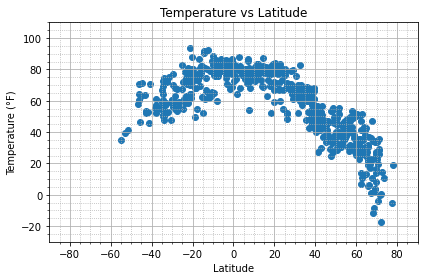

<Figure size 432x288 with 0 Axes>

In [93]:
#plot of temperatuer versus Latitude
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]


plt.scatter(x_values,y_values)
plt.title('Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.ylim(-30, 110)
plt.xlim(-90, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/temp_v_lat.png")

## Latitude vs. Humidity Plot

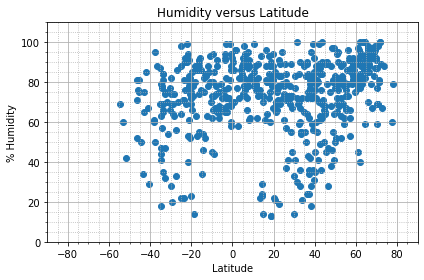

<Figure size 432x288 with 0 Axes>

In [96]:
x_values = cities_df["Lat"]
y_values = cities_df["Percent Humidity"]


plt.scatter(x_values,y_values)
plt.title('Humidity versus Latitude')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.ylim(0, 110)
plt.xlim(-90, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/humidity_v_lat.png")

## Latitude vs. Cloudiness Plot

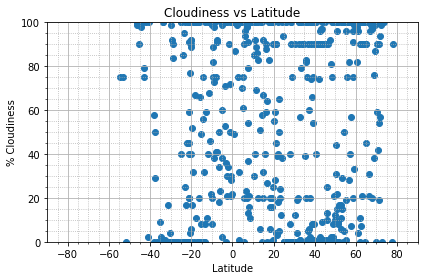

<Figure size 432x288 with 0 Axes>

In [98]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]


plt.scatter(x_values,y_values)
plt.title('Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.ylim(0, 100)
plt.xlim(-90, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/cloudiness_v_lat.png")

## Latitude vs. Wind Speed Plot

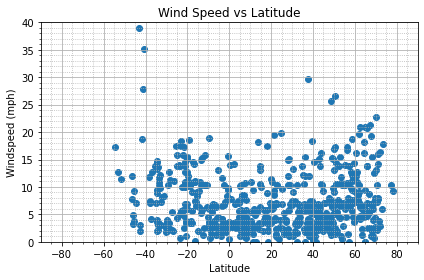

<Figure size 432x288 with 0 Axes>

In [104]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]


plt.scatter(x_values,y_values)
plt.title('Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.ylim(0, 40)
plt.xlim(-90,90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/wind_speed_v_lat.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [107]:
#creating dataframe of Latitudes only found in Northern Hemisphere
northernH_df = cities_df .loc[cities_df['Lat'] > 0]
northernH_df.head()


,City ID,City,Country,Lat,Long,Temperature,Percent Humidity,Clouds,Wind Speed,Max Temp
1,6170031,Tuktoyaktuk,CA,69.4541,-133.0374,26.01,92,99,4.29,26.01
2,3980614,Valle de Juárez,MX,19.9333,-102.9333,59.11,94,100,3.67,59.11
4,2264557,Ponta do Sol,PT,32.6667,-17.1000,68.36,67,57,6.87,68.72
5,306569,Konya Province,TR,38.1667,32.5000,45.88,72,74,11.99,45.88
6,463144,Zheshart,RU,62.0731,49.5733,27.52,84,11,7.16,27.52


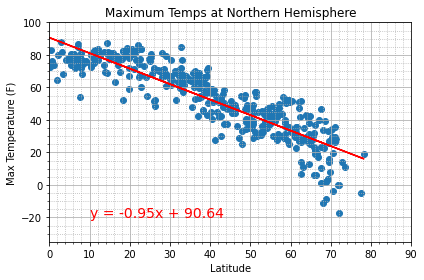

<Figure size 432x288 with 0 Axes>

In [111]:
x_values = northernH_df["Lat"]
y_values = northernH_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Maximum Temps at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(-35,100)
plt.xlim(0, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/max_temp_northern_hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [112]:
#creating dataframe of only Southern Hemisphere latitudes
southernH_df = cities_df .loc[cities_df['Lat'] < 0]
southernH_df.head()

,City ID,City,Country,Lat,Long,Temperature,Percent Humidity,Clouds,Wind Speed,Max Temp
0,4032243,Vaini,TO,-21.2000,-175.2000,78.96,78,20,13.80,78.96
3,2162662,Inverell,AU,-29.7833,151.1167,70.16,28,99,4.00,70.16
9,1651810,Airai,TL,-8.9266,125.4092,76.06,44,98,1.66,76.06
13,3833367,Ushuaia,AR,-54.8000,-68.3000,35.26,69,75,17.27,35.26
15,2075265,Busselton,AU,-33.6500,115.3333,57.58,65,100,10.42,57.58


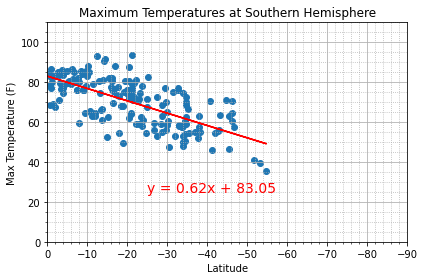

<Figure size 432x288 with 0 Axes>

In [120]:
x_values = southernH_df["Lat"]
y_values = southernH_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Maximum Temperatures at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(0,110)
plt.xlim(0,-90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/max_temp_southern_hemisphere.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

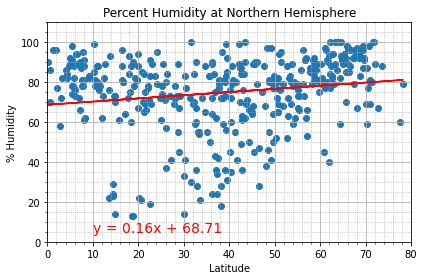

<Figure size 432x288 with 0 Axes>

In [121]:
x_values = northernH_df["Lat"]
y_values = northernH_df["Percent Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Percent Humidity at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.ylim(0,110)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/percent_humidity_northern_hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

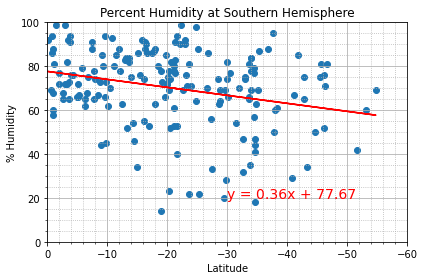

<Figure size 432x288 with 0 Axes>

In [122]:
x_values = southernH_df["Lat"]
y_values = southernH_df["Percent Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Percent Humidity at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.ylim(0,100)
plt.xlim(0,-60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/percent_humidity_southern_hemisphere.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

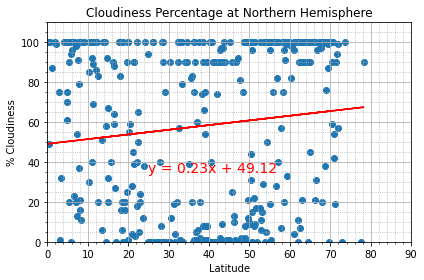

<Figure size 432x288 with 0 Axes>

In [130]:
x_values = northernH_df["Lat"]
y_values = northernH_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness Percentage at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,35),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.ylim(0,110)
plt.xlim(0, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/percent_cloudiness_northern_hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

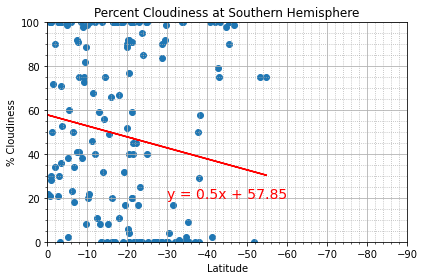

<Figure size 432x288 with 0 Axes>

In [128]:
x_values = southernH_df["Lat"]
y_values = southernH_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Percent Cloudiness at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.ylim(0,100)
plt.xlim(0,-90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/percent_cloudiness_southern_hemisphere.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

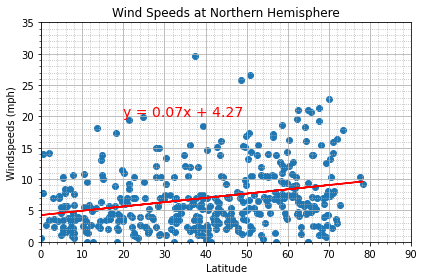

<Figure size 432x288 with 0 Axes>

In [127]:
x_values = northernH_df["Lat"]
y_values = northernH_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeeds (mph)')
plt.ylim(0,35)
plt.xlim(0, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/wind_speed_northern_hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

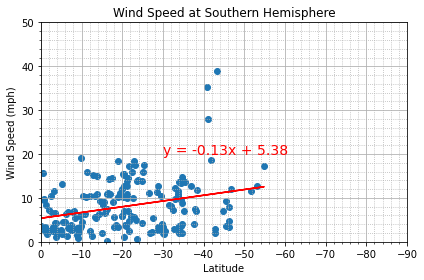

<Figure size 432x288 with 0 Axes>

In [136]:
x_values = southernH_df["Lat"]
y_values = southernH_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0,50)
plt.xlim(0,-90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/wind_speed_southern_hemisphere.png")